In [1]:
# Importing Necessary Libraries
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
# Importing the Dataset
# MNIST is such a famous Dataset that TensorFlow has stored under its datasets
mnist = tf.keras.datasets.mnist #28*28 image of handwritten of 0-9 
# Loading the data into train and test files
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [3]:
# Checking the shape of Data
print("Training Data Shape is {}".format(x_train.shape))
print("Training Labels Shape is {}".format(y_train.shape))
print("Testing Data Shape is {}".format(x_test.shape))
print("Testing Labels Shape is {}".format(y_test.shape))

Training Data Shape is (60000, 28, 28)
Training Labels Shape is (60000,)
Testing Data Shape is (10000, 28, 28)
Testing Labels Shape is (10000,)


In [4]:
# Looking at the values inside an Image
print("Sample Training Data is {}".format(x_train[0]))

Sample Training Data is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [5]:
# Looking at the Labels
print("Sample Training label is {}".format(y_train[0:5]))

Sample Training label is [5 0 4 1 9]


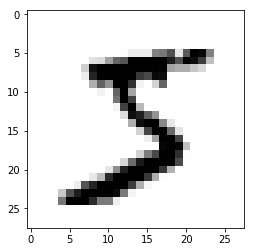

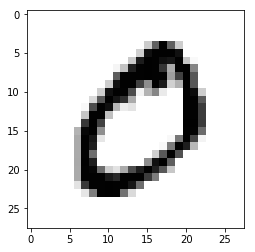

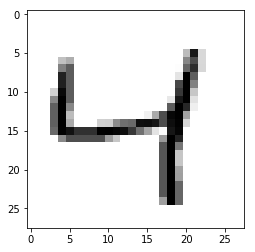

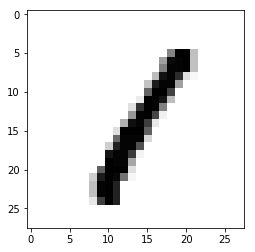

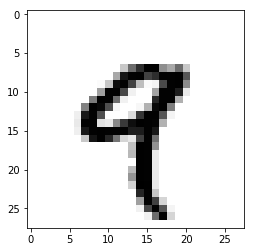

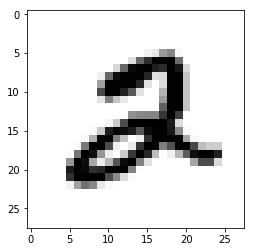

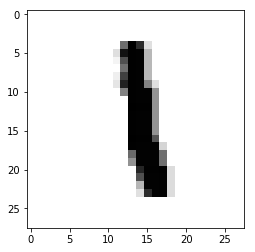

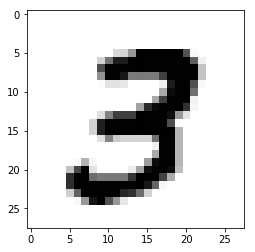

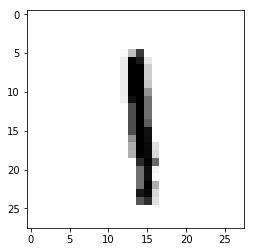

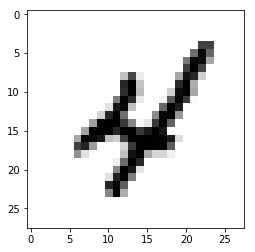

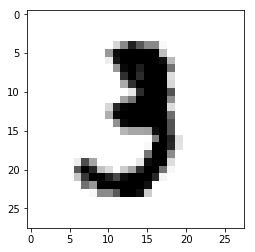

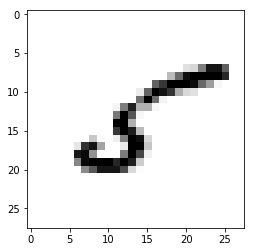

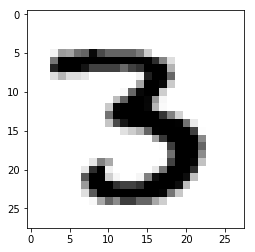

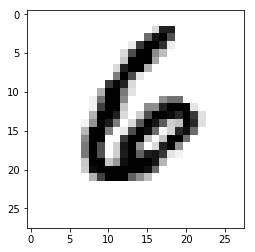

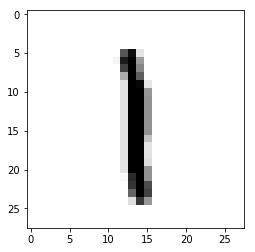

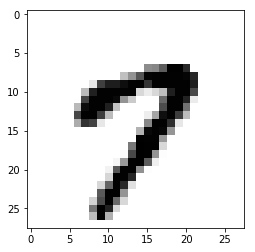

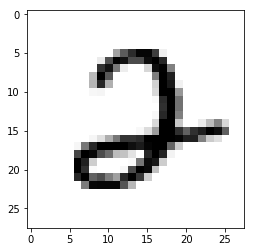

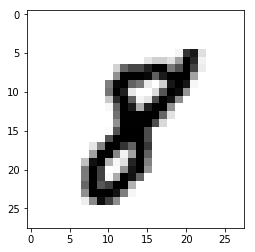

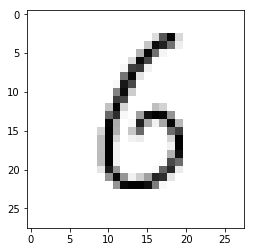

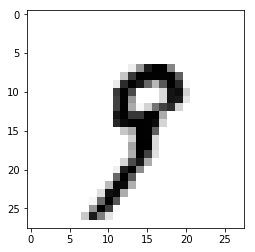

In [6]:
# Viewing the images
for i in range(0,20):
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.show()

In [7]:
# Normalizing the images 
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [8]:
# Image data after normalizing
print("Training Data after normalizing is {}".format(x_train[0]))
print("Testing  Data after normalizing is {}".format(x_test[0]))

Training Data after normalizing is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [138]:
# Creating the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train,y_train,epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 13s 214us/step - loss: 0.2639 - acc: 0.9216
Epoch 2/3
60000/60000 [==============================] - 12s 198us/step - loss: 0.1080 - acc: 0.9664
Epoch 3/3
60000/60000 [==============================] - 12s 195us/step - loss: 0.0724 - acc: 0.9771


In [139]:
# Storing the predictions on x_test
predictions = model.predict([x_test])

In [140]:
# Viewing the probability distribution for the predictions on first test data
print("Probability distribution for a multi-class classification")
predictions[0]

Probability distribution for a multi-class classification


array([5.49862422e-09, 6.71088287e-08, 1.63371078e-05, 4.42416349e-05,
       1.00174584e-10, 2.20050076e-08, 1.45765296e-15, 9.99939322e-01,
       6.87141233e-09, 4.33180531e-08], dtype=float32)

In [141]:
# Checking for which value the prediction is maximum
predictions[0].argmax()

7

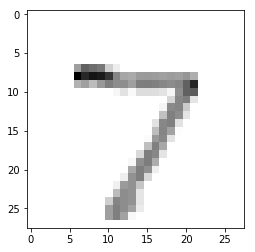

In [142]:
# First Test Data
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

In [143]:
# Evaluation of the Model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 91us/step
0.08664039175286889 0.9756


In [144]:
print(np.argmax(predictions[0]))

7


In [145]:
# Taking new_data through webcam
import cv2
cap = cv2.VideoCapture(0)
def make_1080p():
    cap.set(3, 1920)
    cap.set(4, 1080)
make_1080p()

def rescale_frame(frame, percent1=75,percent2= 75):
    width = int(frame.shape[1] * percent1/ 100)
    height = int(frame.shape[0] * percent2/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

while True:
    rect, frame = cap.read()
    frame = rescale_frame(frame,percent1= 30 ,percent2=100)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == 13:
        img = frame
        break
    elif cv2.waitKey(1) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

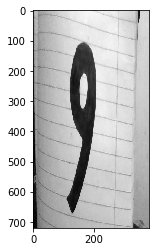

In [146]:
# Converting Color image to Black and White
bw_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(bw_img,cmap = 'gray')

In [147]:
# Enhancing the features of the image
ret,thres = cv2.threshold(bw_img,100,255,cv2.THRESH_BINARY)

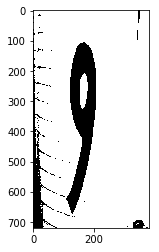

In [148]:
# Viewing Image
plt.imshow(thres,cmap = 'gray')

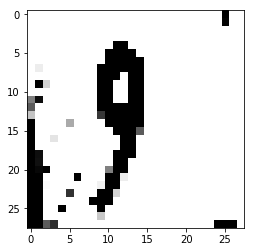

Probability Distribution for 0 1.3975962e-05
Probability Distribution for 1 5.1741154e-06
Probability Distribution for 2 6.084325e-06
Probability Distribution for 3 0.011989286
Probability Distribution for 4 3.742243e-06
Probability Distribution for 5 0.80727965
Probability Distribution for 6 1.2216353e-05
Probability Distribution for 7 3.2744234e-07
Probability Distribution for 8 0.17832725
Probability Distribution for 9 0.0023623856
The Predicted Value is 5


In [149]:
# Converting image into appropriate shape and predicting its value
img_size = 28
thres = cv2.bitwise_not(thres)
new_array = cv2.resize(thres, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict([[user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))

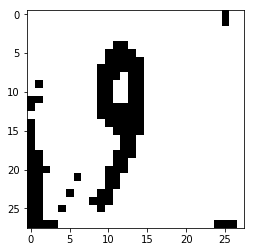

In [150]:
ret,new_user_test = cv2.threshold(user_test,.2,1,cv2.THRESH_BINARY)
plt.imshow(new_user_test,plt.cm.binary)

In [151]:
predicted = model.predict([[new_user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))

Probability Distribution for 0 2.0355256e-12
Probability Distribution for 1 1.7126301e-12
Probability Distribution for 2 4.0105812e-13
Probability Distribution for 3 2.6129232e-05
Probability Distribution for 4 1.0175352e-12
Probability Distribution for 5 0.99620783
Probability Distribution for 6 1.2571122e-11
Probability Distribution for 7 4.8309095e-16
Probability Distribution for 8 0.0037647132
Probability Distribution for 9 1.2850935e-06
The Predicted Value is 5


In [152]:
x_test[0].max()

0.9001142474626551

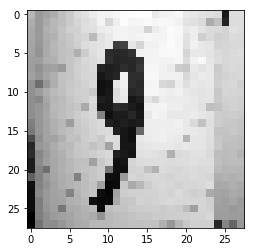

In [153]:
img_size = 28
bw_img = cv2.bitwise_not(bw_img)
new_array = cv2.resize(bw_img, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()

In [154]:
ret,thres = cv2.threshold(new_array,150,255,cv2.THRESH_BINARY)

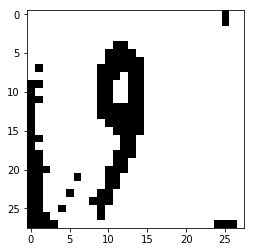

In [155]:
plt.imshow(thres,plt.cm.binary)

In [156]:
user_test = tf.keras.utils.normalize(thres, axis = 1)
predicted = model.predict([[user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))

Probability Distribution for 0 7.563166e-06
Probability Distribution for 1 5.2258583e-06
Probability Distribution for 2 1.2040958e-05
Probability Distribution for 3 0.035995577
Probability Distribution for 4 2.988694e-06
Probability Distribution for 5 0.8373376
Probability Distribution for 6 2.446024e-06
Probability Distribution for 7 9.3969817e-07
Probability Distribution for 8 0.12388479
Probability Distribution for 9 0.0027509073
The Predicted Value is 5
